In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os 
os.chdir('/content/drive/MyDrive/vietnamesesentiment ')

In [ ]:
import pandas as pd 
df = pd.read_csv('combine.csv')
df.head()

,sentence,label
0,Tao hít không khí thui cũng mập địt 😂😂,1
1,Nguyễn Hồng DiệuÝ má chị hằng mập địt vler,0
2,Lê Viết Quang nghe rất địt mẹ mày,0
3,Thành Trần địt phải chả bạn ơi nó lấy lãy 50% ...,0
4,Vay của home còn đỡ Bọn f.e t đéo vay bgio mu...,0


In [ ]:
df['label'].value_counts()

2    16822
0    15775
1      515
Name: label, dtype: int64

In [ ]:
print(df['sentence'][12])
print(df['label'][12])

Chị lại tuỏng con mẹ nó dạy địt nam vô địt bó tay luôn😂
1


In [ ]:
!pip install transformers

     |████████████████████████████████| 2.0MB 17.6MB/s 
     |████████████████████████████████| 890kB 51.6MB/s 
     |████████████████████████████████| 3.2MB 48.9MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=34c45815e83228833e93a1b234ee0081cd5a4ddf9ae9aa5f7e8ee0751399610d
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-uncased', do_lower_case=True)

In [ ]:
train_text = df['sentence'].values.tolist()
train_label = df['label'].values.tolist()

In [ ]:
train_text

['Tao hít không khí thui cũng mập địt 😂😂',
 'Nguyễn Hồng DiệuÝ má chị hằng mập địt vler',
 'Lê Viết Quang nghe rất địt mẹ mày',
 'Thành Trần địt phải chả bạn ơi nó lấy lãy 50% đấy cứ trầy ra nó đéo làm gì đc đâu :))',
 'Vay của home còn đỡ  Bọn f.e t đéo vay bgio mua trả góp đt 1 lần xong cno cứ gọi điện chào mời vay tiền vì t có hồ sơ tốt (mua 2 đt trả tiền trc hạn )  Ngày địt nào cg 1 cuộc, đang ngủ cũng gọi, đi ỉa cũng gọi luôn làm đéo mót ở nữa kéo quần đứng dạy luôn -_-',
 'Lê Hoàng Nam địt mẹ =)) thua nhiều quá bro ạ',
 'Bíchh Ngọcc đcm suốt ngày cno gọi ngủ cũng địt yên!',
 'Đi gạ địt trai cũng đéo yên nữa',
 'Khi bạn và nó dựa lưng vào nhau mà 2 đứa đéo có cảm giác j vào đéo muốn địt nhau thì đó là bạn thân 🙂🙂🙂🙂',
 'Lê Thanh Thảo địt mẹ phải chi m đừng chui ra vào tháng 3 thì quá là hợp lí luôn r',
 'Minh Hằng 🙂 địt mẹ m tha cho t',
 'A Tuấn Bêu cầm minh béo mập địt đi kéo bùa troll đúng bài😂😂',
 'Chị lại tuỏng con mẹ nó dạy địt nam vô địt bó tay luôn😂',
 'địt mẹ rich vcl vậy',

In [ ]:
print(train_label)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 

In [ ]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'
tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: When was I last outside? I am stuck at home for 2 weeks.
   Tokens: ['when', 'was', 'i', 'last', 'outside', '?', 'i', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']
Token IDs: [10704, 10140, 151, 11706, 16751, 136, 151, 10345, 27048, 10160, 11402, 10139, 123, 19746, 119]


In [ ]:
input_ids = []
for sent in train_text:
  encoded_sent = tokenizer.encode(sent,add_special_tokens=True)
  input_ids.append(encoded_sent)

Token indices sequence length is longer than the specified maximum sequence length for this model (644 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
print(train_text[0])
print(input_ids[0])
print(tokenizer.decode(input_ids[0]))

Tao hít không khí thui cũng mập địt 😂😂
[101, 13738, 14105, 11808, 11839, 11778, 10116, 11427, 10794, 17170, 10123, 100, 102]
[CLS] tao hit khong khi thui cung map đit [UNK] [SEP]


In [ ]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  644


In [ ]:
sen_len = [len(sen) for sen in input_ids]
print(sen_len)

[13, 14, 11, 31, 84, 16, 20, 12, 32, 25, 12, 20, 18, 9, 9, 5, 18, 26, 8, 14, 11, 21, 9, 18, 11, 11, 43, 24, 9, 8, 28, 9, 25, 21, 7, 10, 32, 12, 10, 10, 8, 12, 10, 39, 12, 15, 35, 7, 13, 12, 16, 8, 6, 10, 17, 14, 25, 8, 7, 9, 7, 5, 9, 15, 18, 11, 14, 5, 6, 24, 7, 26, 36, 7, 15, 22, 8, 26, 7, 10, 7, 14, 10, 8, 21, 12, 11, 18, 7, 11, 13, 14, 7, 13, 19, 10, 12, 23, 27, 17, 8, 17, 36, 26, 13, 22, 9, 23, 13, 8, 8, 14, 31, 22, 12, 11, 9, 14, 19, 41, 29, 11, 30, 22, 14, 10, 23, 12, 8, 13, 16, 18, 13, 21, 17, 12, 13, 25, 14, 14, 17, 12, 13, 45, 10, 31, 14, 15, 20, 20, 15, 10, 14, 13, 21, 17, 43, 18, 10, 20, 24, 62, 36, 27, 37, 46, 10, 54, 12, 21, 73, 22, 46, 6, 23, 12, 22, 12, 22, 51, 26, 12, 32, 11, 36, 14, 11, 51, 15, 24, 15, 9, 32, 11, 15, 5, 19, 10, 16, 13, 4, 4, 29, 12, 10, 21, 3, 23, 22, 45, 9, 76, 36, 38, 23, 57, 20, 8, 12, 18, 16, 9, 17, 7, 18, 21, 15, 19, 31, 13, 20, 11, 18, 40, 12, 25, 15, 22, 15, 13, 8, 9, 41, 20, 14, 13, 24, 19, 23, 39, 16, 14, 19, 22, 16, 13, 25, 15, 6, 20, 10, 16,

In [ ]:
min(sen_len)

3

In [ ]:
sum(sen_len)/len(sen_len)

56.66048562454699

In [ ]:
import numpy as np

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


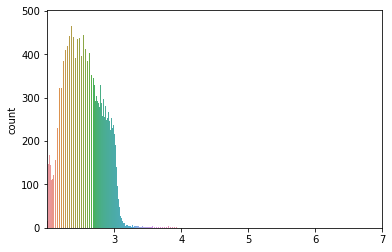

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(sen_len)
plt.xticks(np.arange(100,600,100))
plt.show()

In [ ]:
from keras.preprocessing.sequence import pad_sequences
MAX_LEN = 512 # yêu cầu đầu vào của pretrained model là 512
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Done.


In [ ]:
input_ids.shape

(33112, 512)

In [ ]:
# Create attention masks
attention_masks = []

for sent in input_ids:
    att_mask = [int(token_id > 0) for token_id in sent]
    attention_masks.append(att_mask)

In [ ]:
seed = 42
batch_size = 8
maxlen = 512
epochs = 4
lr = 2e-5

In [ ]:
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_labels, validation_labels = train_test_split(input_ids, train_label, 
                                                            random_state=2018, test_size=0.1)

train_masks, validation_masks, _, _ = train_test_split(attention_masks, train_label,
                                             random_state=2018, test_size=0.1)

In [ ]:
import torch
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_labels = torch.tensor(train_labels)
validation_labels = torch.tensor(validation_labels)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.
# Đã thử với batch size là 16 và 32 nhưng đều bị CUDA out of memory 


# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-multilingual-uncased", 
    num_labels = 3, # The number of output labels--2 for binary classification.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [ ]:
optimizer = AdamW(model.parameters(),
                  lr = lr, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup


# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, 
                                            num_training_steps = total_steps)

In [ ]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
device = 'cuda'

In [ ]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.


random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    model.train()

    # For each batch of training data
    for step, batch in enumerate(train_dataloader):

        #  update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of  3,725.    Elapsed: 0:00:29.
  Batch    80  of  3,725.    Elapsed: 0:00:59.
  Batch   120  of  3,725.    Elapsed: 0:01:30.
  Batch   160  of  3,725.    Elapsed: 0:02:01.
  Batch   200  of  3,725.    Elapsed: 0:02:32.
  Batch   240  of  3,725.    Elapsed: 0:03:04.
  Batch   280  of  3,725.    Elapsed: 0:03:36.
  Batch   320  of  3,725.    Elapsed: 0:04:08.
  Batch   360  of  3,725.    Elapsed: 0:04:40.
  Batch   400  of  3,725.    Elapsed: 0:05:12.
  Batch   440  of  3,725.    Elapsed: 0:05:45.
  Batch   480  of  3,725.    Elapsed: 0:06:17.
  Batch   520  of  3,725.    Elapsed: 0:06:50.
  Batch   560  of  3,725.    Elapsed: 0:07:23.
  Batch   600  of  3,725.    Elapsed: 0:07:56.
  Batch   640  of  3,725.    Elapsed: 0:08:29.
  Batch   680  of  3,725.    Elapsed: 0:09:01.
  Batch   720  of  3,725.    Elapsed: 0:09:34.
  Batch   760  of  3,725.    Elapsed: 0:10:07.
  Batch   800  of  3,725.    Elapsed: 0:10:40.
  Batch   840  of